In [1]:
# La importación la eliminaré cuando acabe el script de transformar.
# La pongo para importar el df.
import pandas as pd

def extract(json_name):
    df = pd.read_json(json_name, encoding = 'utf8')
    return df

df = extract("Reggaeton_lyrics.json")
df.head()

,Artist,Title,Lyrics
0,Karol G,Ocean,"[Si algún día te vas de casa (de casa), Yo te ..."
1,Karol G,Dices Que Te Vas (part. Anuel AA),"[No sé, no-no sé, Yo me despierto y busco tus ..."
10,Karol G,Go Karo,"[O-O-Ovy On The Drums, Go, Karo!, Enloqueció l..."
100,Daddy Yankee,Soltera (remix),"[[Bad Bunny y daddy yankee], Épico, Salte 'el ..."
101,Daddy Yankee,Con Calma (remix) (part. Katy Perry y Snow),"[D-D-D-D-D-DY, ¡Ay, Daddy!, Play N' Skillz, Ka..."


In [ ]:
"""
from textblob import TextBlob

def analyze_spanish_sentiment(l):
    song_translated = []
    # noun_phrases = []
    sentim = []
    try:
        for verse in l:
            blob = TextBlob(verse)
            verse_translated = blob.translate(to="en")
            song_translated.append(verse_translated)
            # noun_phrases.append(verse_translated.noun_phrases) # No me convencen los resultados.
            sentim.append(verse_translated.sentiment.polarity)
    except:
        pass
    return song_translated, sentim
"""

In [2]:
def translate_list(l):
    list_translated = []
    try:
        for line in l:
            blob = TextBlob(line)
            line_translated = blob.translate(to="en")
            list_translated.append(line_translated)
    except:
        pass
    return list_translated

def analyze_sentiment(l):
    sentim = []
    try:
        for line in l:
            blob = TextBlob(line)
            sentim.append(blob.sentiment.polarity)
    except:
        pass
    return sentim

In [ ]:
df['Translation'] = df['Lyrics'].apply(translate_list)
df['Sentiment'] = df['Lyrics'].apply(analyze_sentiment)

In [5]:
df.head()

,Artist,Title,Lyrics,Translation,Sentiment
0,Karol G,Ocean,"[Si algún día te vas de casa (de casa), Yo te ...",[],[]
1,Karol G,Dices Que Te Vas (part. Anuel AA),"[No sé, no-no sé, Yo me despierto y busco tus ...",[],[]
10,Karol G,Go Karo,"[O-O-Ovy On The Drums, Go, Karo!, Enloqueció l...",[],[]
100,Daddy Yankee,Soltera (remix),"[[Bad Bunny y daddy yankee], Épico, Salte 'el ...",[],[]
101,Daddy Yankee,Con Calma (remix) (part. Katy Perry y Snow),"[D-D-D-D-D-DY, ¡Ay, Daddy!, Play N' Skillz, Ka...",[],[]


In [4]:
import statistics
df['Sent_mean'] = df['Sentiment'].apply(statistics.mean)

StatisticsError: mean requires at least one data point

In [ ]:
df.head(20)

In [ ]:
# Media del sentimiento por canción
# Nube de palabras de todas las canciones. Antes habrá que eliminar las stopwords
# Hacer stemming para que la nube sea más concluyente. snowballstemmer
# get_max_freq

In [3]:
df.iloc[1,2]

['No sé, no-no sé',
 'Yo me despierto y busco tus mensajes',
 'Y tú me hablas y me río',
 'Y me encanta',
 'Pero si no me hablas, me desespero',
 'Y a mí me da miedo enamorarme',
 'Yo creo que así es mejor',
 'Buscando una entrada en tu corazón',
 'Ya te pinté más cuadros que el mismo Vincent van Gogh',
 'Pero la vida nos separa y nos deja en la nada',
 'Y cuelga de un hilo nuestra relación',
 'Ya yo he buscado mil maneras para no perder',
 'Pero en el juego del amor, ya yo perdí tu piel',
 "Buscando mil razones pa' que tú te quedes",
 'Pero si quieres tu espacio, te voy a entender',
 'Dices que te vas y me abandonas',
 'Dices que te vas por el temor',
 'Y tienes miedo a enamorarte',
 'Porque puedo lastimarte',
 'Pero esa no es mi intención',
 'Yo no sé por qué sigues tan necio',
 'Buscando robar mi corazón',
 'Y aunque siempre ando en mi cama',
 'Esperando tu llamada',
 'Hoy me voy, es lo mejor',
 'Dices que te vas, ooh, eh',
 'Tú eres mi fuerza, mi esperanza, tú eres mi motor (mi mot

In [21]:
def flatten_list(l):
    """
    Receive a list of lists and return a list with just one element.
    """
    return sum(l, [])

In [29]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
def remove_stopwords(l):
    new_list = []
    stop_words = set(stopwords.words('spanish')) 
    for sentence in l:
        word_tokens = word_tokenize(sentence) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        filtered_sentence = [word.lower() for word in filtered_sentence if word.isalpha()]
        new_list.append(filtered_sentence)
    return flatten_list(new_list)

In [30]:
df['No_stopwords'] = df['Lyrics'].apply(remove_stopwords)
df.iloc[1,3]

[]

In [31]:
from wordcloud import WordCloud #, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [32]:
# Start with one review:
def print_wordcloud(df):
    text = " ".join(df['No_stopwords'].sum()) # Concatena todos los versos de todas las canciones de la columna

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

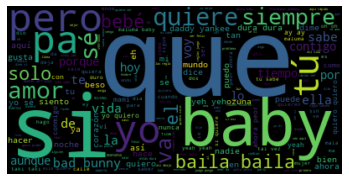

In [33]:
print_wordcloud(df)

In [28]:
df.head()

,Artist,Title,Lyrics,Translation,Sentiment,No_stopwords
0,Karol G,Ocean,"[Si algún día te vas de casa (de casa), Yo te ...",[],[],si algún día vas casa casa yo llevo nasa yeh p...
1,Karol G,Dices Que Te Vas (part. Anuel AA),"[No sé, no-no sé, Yo me despierto y busco tus ...",[],[],no sé sé yo despierto busco mensajes y hablas ...
10,Karol G,Go Karo,"[O-O-Ovy On The Drums, Go, Karo!, Enloqueció l...",[],[],on the drums go karo enloqueció gente club cua...
100,Daddy Yankee,Soltera (remix),"[[Bad Bunny y daddy yankee], Épico, Salte 'el ...",[],[],bad bunny daddy yankee épico salte medio eh su...
101,Daddy Yankee,Con Calma (remix) (part. Katy Perry y Snow),"[D-D-D-D-D-DY, ¡Ay, Daddy!, Play N' Skillz, Ka...",[],[],daddy play n skillz katy perry run llamas baby...
